# Vaje 5: Metoda podpornih vektorjev

## Naloga 1: Linearno jedro in parameter C (cena)

1.a: Pripravi umetne, linearno ločljive podatke z dvema napovednima spremenljivkama. Množica podatkov naj vsebuje 1000 točk in naj bo mešanica dveh normalnih porazdelitev; ene s centrom v -2 in druge s centrom v 2. Ciljna spremenljivka naj bo dvojiška, njeni vrednosti pa naj sovpadata z obema porazdelitvama. 

In [38]:
import numpy as np
# jst sm definitivno drugac razumela navodila...

# Podatki iz normalne porazdelitve z centrom v -2 ter njihove ciljne vrednosti (0) 
negative_examples = np.random.normal(-2, size=(500, 2))
negative_y = np.zeros(shape=(500,))

# Podatki iz normalne porazdelitve z centrom v 2 ter njihove ciljne vrednosti (1) 
positive_examples = np.random.normal(2, size=(500, 2))
positive_y = np.ones(shape=(500,))

# Združimo podatke
X = np.concatenate([positive_examples, negative_examples])
y = np.concatenate([positive_y, negative_y])


1.b: Podatke vizualiziraj s pomočjo metode `matplotlib.pyplot.scatter`. So podatki res linearno ločljivi?

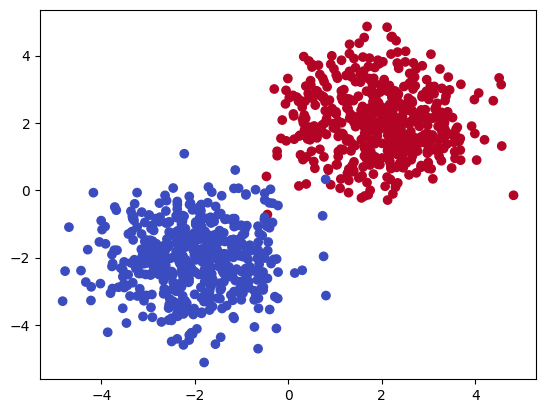

In [39]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap="coolwarm")
plt.show()


1.c: Natreniraj model podpornih vektorje z linearnim jedrom in oceni njegovo točnost.

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [modelom sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
   
</details>

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import KFold


kf = KFold(shuffle= True)
acc = []

for data_train, data_test in kf.split(X):
    X_train, y_train = X[data_train], y[data_train]
    X_test, y_test = X[data_test], y[data_test]

    
    model = SVC(kernel='linear').fit(X_train, y_train)
    y_pred = model.predict(X_test)
    

    acc.append(accuracy_score(y_test, y_pred))

print(acc)
print('povprecje:', np.mean(acc))

[1.0, 0.995, 1.0, 0.99, 1.0]
povprecje: 0.9970000000000001


1.d: Natreniraj model podpornih vektorjev na vseh podatkih in vizualiziraj odločitveno krivuljo s pomočjo metode `vizualize_decision_boundery`. Je model uspel podatke pravilno ločiti.

In [41]:
def vizualize_decision_boundery(model, X, y):
    h = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

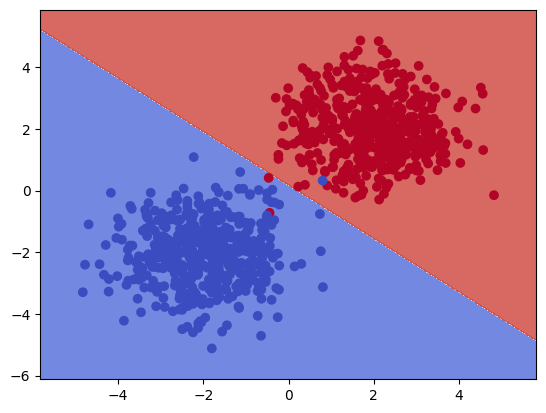

In [42]:
model = SVC(kernel='linear').fit(X,y)

vizualize_decision_boundery(model, X, y)

1.e: Podatkovni množici dodaj 50 točk, ki bodo vzorčeni iz normalne porazdelitve s centrom v [-10, 2]. Ciljna vrednost novih točk naj sovpada s ciljno vrednostjo točk iz porazdelitve s centrom v 2. 

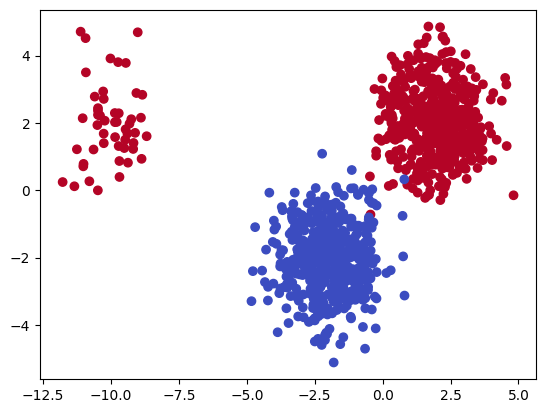

In [43]:
new_examples = np.random.normal([-10, 2], size=(50, 2))
new_y = np.ones(shape=(50,))

# Združimo podatke
X_new = np.concatenate([X, new_examples])
y_new = np.concatenate([y, new_y])

plt.scatter(x=X_new[:,0], y=X_new[:,1], c=y_new, cmap="coolwarm")
plt.show()

1.f: Preveri točnost modela podpornih vektorjev za različno vrednost parametra C.

In [44]:
accuracy=[]
for c in [0.001, 0.01, 0.1, 1, 10, 100]:

    kf = KFold(shuffle= True)
    acc = []

    for data_train, data_test in kf.split(X_new):
        X_train, y_train = X_new[data_train], y_new[data_train]
        X_test, y_test = X_new[data_test], y_new[data_test]

        
        model = SVC(kernel='linear', C=0.1).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        

        acc.append(accuracy_score(y_test, y_pred))

    print('povprecje:', np.mean(acc), 'za C=', c)
    accuracy.append(np.mean(acc))

povprecje: 0.9838095238095239 za C= 0.001
povprecje: 0.9828571428571429 za C= 0.01
povprecje: 0.9838095238095239 za C= 0.1
povprecje: 0.9838095238095239 za C= 1
povprecje: 0.9828571428571429 za C= 10
povprecje: 0.9828571428571429 za C= 100


1.g: Vizualiziraj odločitveno krivuljo za različne vrednosti parametra C. Se krivulja spremeni med različnimi vrednostmi. Če se, kakšna je ta sprememba?

0.001


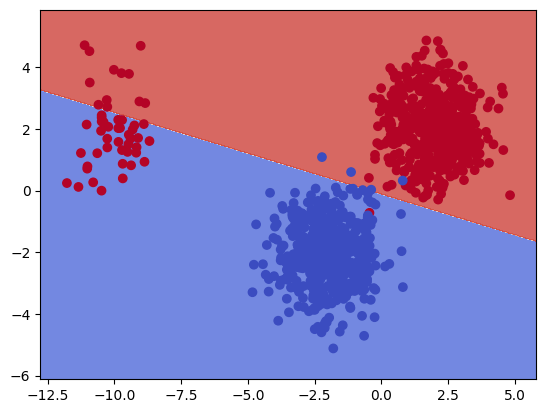

0.01


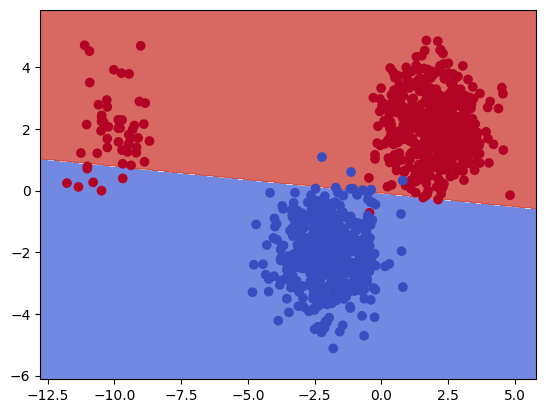

0.1


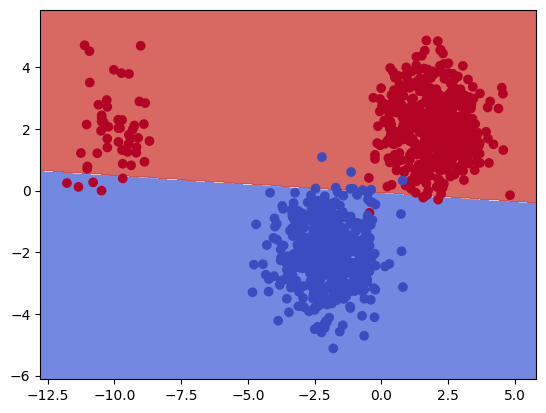

1


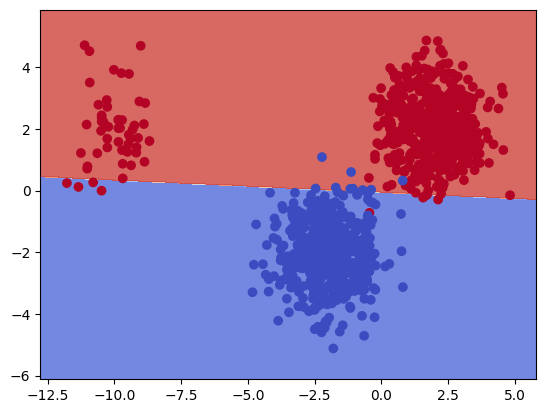

10


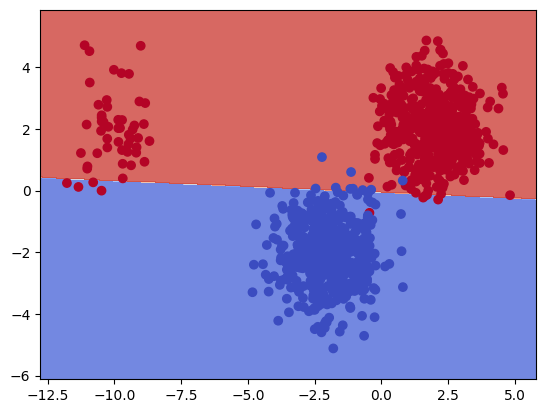

100


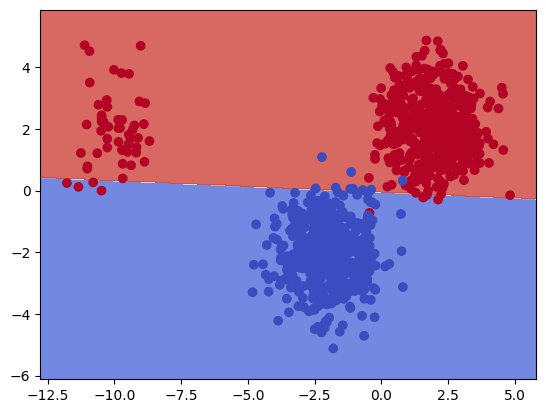

1000


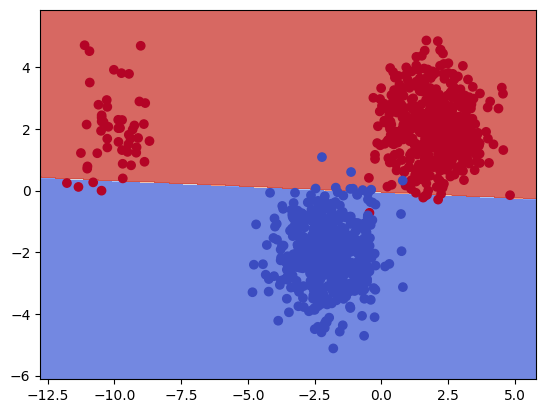

In [45]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = SVC(kernel="linear", C=c).fit(X_new, y_new)
    print(c)
    vizualize_decision_boundery(model, X_new, y_new)
    
# Vidimo lahko, da ima krivulja pri večjih vrednostih parametra C v našem primeru manjši naklon

## Naloga 2: Različna jedra

2.a: Poglejmo primer podatkov, ki niso ločljivi linearno. Sestavi podatkovno množico, kjer bodo podatki razdeljeni v dva koncentrična kroga. Radij naj bo vzorčen iz mešanice dveh normalinih porazdelitev s centri v 2 in 4, ter standardno deviacijo 0.3, kot pa naj bo porazdeljen enakomerno med 0 in $2*\pi$. Podatke tudi vizualiziraj.

<details>
  <summary>Namig:</summary>
  *Podatke o radiju in kotu ne pozabi pretvoriti v evklidski koordinatni sistem.*
</details>

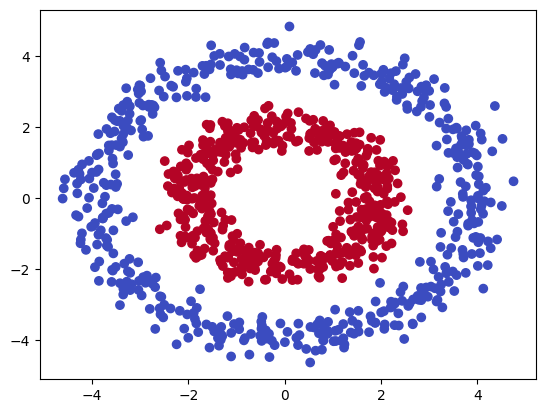

In [55]:
# jst sm definitivno drugac razumela navodila...

# Podatki iz normalne porazdelitve z centrom v -2 ter njihove ciljne vrednosti (0) 
negative_radius = np.random.normal(2, scale=0.3, size=(500))
negative_theta = np.random.random(size=500)
negative_y = np.zeros(shape=(500,))

# Podatki iz normalne porazdelitve z centrom v 2 ter njihove ciljne vrednosti (1) 
positive_radius = np.random.normal(4, scale=0.3, size=(500))
positive_theta = np.random.random(size=500)
positive_y = np.ones(shape=(500,))

radius = np.concatenate([negative_radius, positive_radius])
theta = np.concatenate([negative_theta, positive_theta])
y = np.concatenate([positive_y, negative_y])

#evklidski kooordinatni sistem
X = np.zeros((1000, 2))
X[:, 0] = np.cos(2 * np.pi * theta) * radius
X[:, 1] = np.sin(2 * np.pi * theta) * radius


plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="coolwarm")
plt.show()

2.b: Preveri točnost modela podpornih vektorjev z linearnim jedrom in vizualiziraj odločitveno krivuljo. Je uporaba tega jedra primerna za dane podatke?

[0.565, 0.575, 0.665, 0.535, 0.61]
povprecje: 0.59


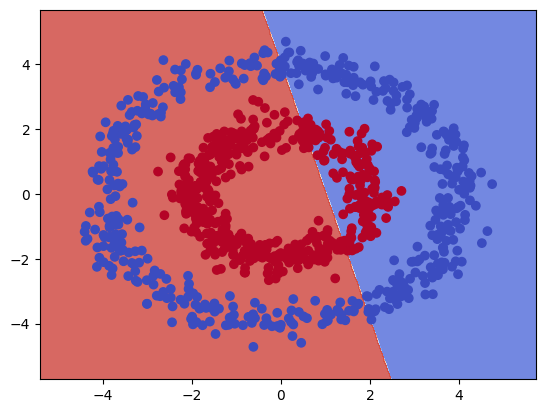

In [47]:
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import KFold


kf = KFold(shuffle= True)
acc = []

for data_train, data_test in kf.split(X):
    X_train, y_train = X[data_train], y[data_train]
    X_test, y_test = X[data_test], y[data_test]

    model = SVC(kernel="linear").fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc.append(accuracy_score(y_test, y_pred))

print(acc)
print('povprecje:', np.mean(acc))


model = SVC(kernel="linear").fit(X, y)
vizualize_decision_boundery(model, X, y)

2.c: Preveri točnost modela podpornih vektorjev z polinomskim jedrom različnih stopenj (npr. 1-5). Za vsako vizualiziraj odločitveno krivuljo. Je uporaba tega jedra bolj primerna za dane podatke? Katere stopnje delujejo boljse in katere slabše?

d= 1
accuracy_score [0.435, 0.52, 0.54, 0.44, 0.52]
povprecje accuracy_score: 0.491


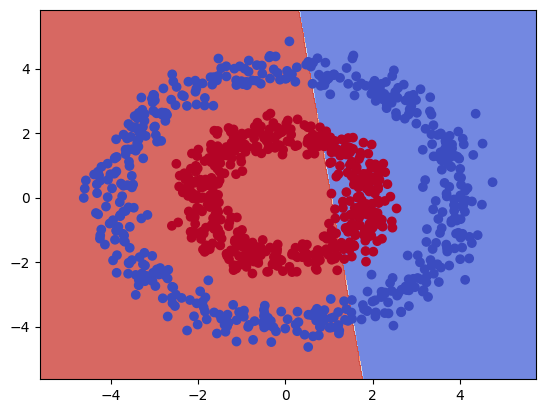

d= 2
accuracy_score [1.0, 1.0, 1.0, 1.0, 1.0]
povprecje accuracy_score: 1.0


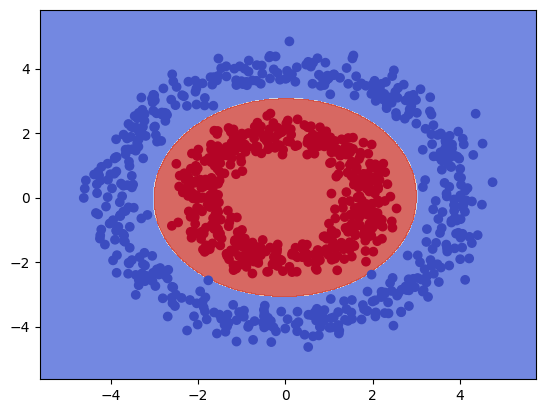

d= 3
accuracy_score [0.605, 0.685, 0.66, 0.68, 0.615]
povprecje accuracy_score: 0.649


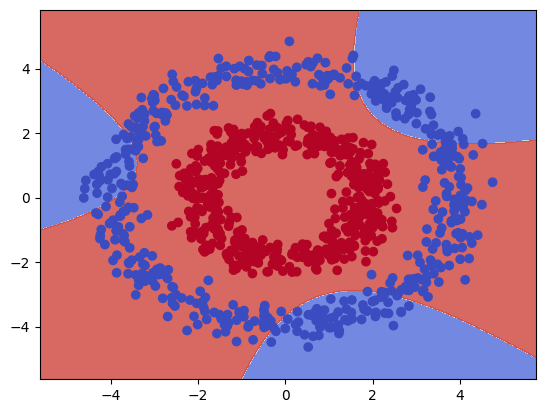

d= 4
accuracy_score [1.0, 0.995, 1.0, 1.0, 1.0]
povprecje accuracy_score: 0.999


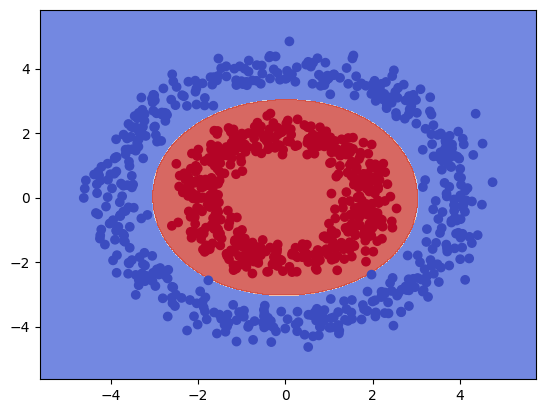

d= 5
accuracy_score [0.595, 0.565, 0.605, 0.655, 0.46]
povprecje accuracy_score: 0.576


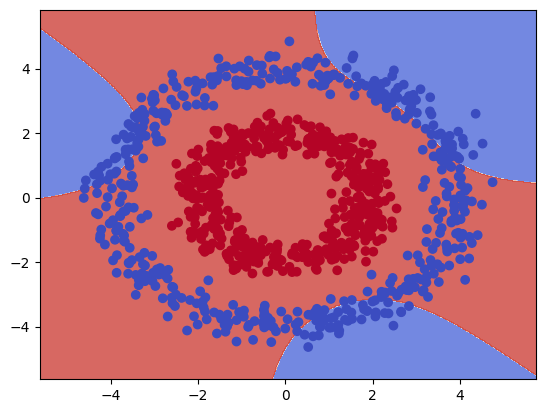

In [56]:
for d in range(1, 6):
    print('d=', d)
    kf = KFold(shuffle= True)
    acc = []

    for data_train, data_test in kf.split(X):
        X_train, y_train = X[data_train], y[data_train]
        X_test, y_test = X[data_test], y[data_test]

        model = SVC(kernel="poly", degree=d).fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))

    print('accuracy_score', acc)
    print('povprecje accuracy_score:', np.mean(acc))


    model = SVC(kernel="poly", degree=d).fit(X, y)
    vizualize_decision_boundery(model, X, y)

2.d: Preveri še točnost modela, ki ima jedrom iz radialnih baznih funkcij ("rbf" v paketu sklearn).

accuracy_score [1.0, 1.0, 1.0, 0.995, 1.0]
povprecje accuracy_score: 0.999


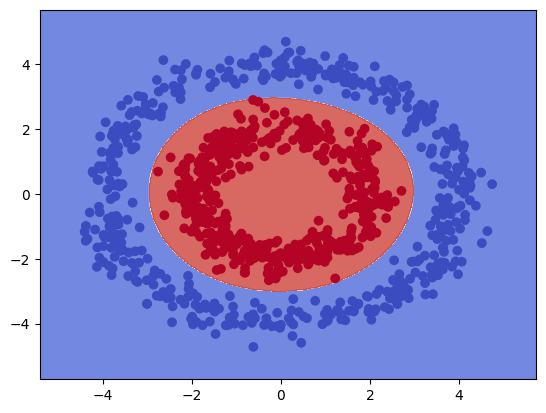

In [49]:
kf = KFold(shuffle= True)
acc = []

for data_train, data_test in kf.split(X):
    X_train, y_train = X[data_train], y[data_train]
    X_test, y_test = X[data_test], y[data_test]

    model = SVC(kernel="poly", degree=d).fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc.append(accuracy_score(y_test, y_pred))

print('accuracy_score', acc)
print('povprecje accuracy_score:', np.mean(acc))

model = SVC(kernel="rbf").fit(X, y)
vizualize_decision_boundery(model, X, y)


2.e: Pripravi novo podatkovno množico, v kateri podatki prihajajo iz istih distribucij, a s standardno deviacijo 2.

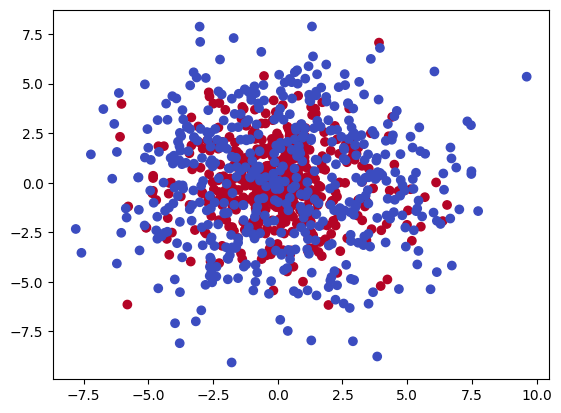

In [57]:
# jst sm definitivno drugac razumela navodila...

# Podatki iz normalne porazdelitve z centrom v -2 ter njihove ciljne vrednosti (0) 
negative_radius = np.random.normal(2, scale=2, size=(500))
negative_theta = np.random.random(size=500)
negative_y = np.zeros(shape=(500,))

# Podatki iz normalne porazdelitve z centrom v 2 ter njihove ciljne vrednosti (1) 
positive_radius = np.random.normal(4, scale=2, size=(500))
positive_theta = np.random.random(size=500)
positive_y = np.ones(shape=(500,))

radius = np.concatenate([negative_radius, positive_radius])
theta = np.concatenate([negative_theta, positive_theta])
y = np.concatenate([positive_y, negative_y])

#evklidski kooordinatni sistem
X = np.zeros((1000, 2))
X[:, 0] = np.cos(2 * np.pi * theta) * radius
X[:, 1] = np.sin(2 * np.pi * theta) * radius


plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="coolwarm")
plt.show()

2.f: Na novih podatkih poišči najboljši SVM model. Preizkusi različna jedra in vrednosti parametra C

In [59]:
accuracy = []

for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    print('linearno jedro, c=', c)
    kf = KFold(shuffle= True)
    acc = []

    for data_train, data_test in kf.split(X):
        X_train, y_train = X[data_train], y[data_train]
        X_test, y_test = X[data_test], y[data_test]

        model = SVC(kernel="linear", C=c).fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))

    print('accuracy_score', acc)
    print('povprecje accuracy_score:', np.mean(acc))
    accuracy.append(np.mean(acc))


for d in range(1, 6):
    print('polinomsko jedro, d=', d)
    kf = KFold(shuffle= True)
    acc = []

    for data_train, data_test in kf.split(X):
        X_train, y_train = X[data_train], y[data_train]
        X_test, y_test = X[data_test], y[data_test]

        model = SVC(kernel="poly", degree=d).fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc.append(accuracy_score(y_test, y_pred))

    print('accuracy_score', acc)
    print('povprecje accuracy_score:', np.mean(acc))
    accuracy.append(np.mean(acc))


print('jedrom iz radialnih baznih funkcij')


for data_train, data_test in kf.split(X):
    X_train, y_train = X[data_train], y[data_train]
    X_test, y_test = X[data_test], y[data_test]

    model = SVC(kernel="rbf").fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc.append(accuracy_score(y_test, y_pred))

print('accuracy_score', acc)
print('povprecje accuracy_score:', np.mean(acc))
accuracy.append(np.mean(acc))

print(accuracy)


linearno jedro, c= 0.001
accuracy_score [0.5, 0.475, 0.47, 0.46, 0.48]
povprecje accuracy_score: 0.477
linearno jedro, c= 0.01
accuracy_score [0.435, 0.585, 0.435, 0.445, 0.45]
povprecje accuracy_score: 0.47000000000000003
linearno jedro, c= 0.1
accuracy_score [0.545, 0.49, 0.51, 0.48, 0.43]
povprecje accuracy_score: 0.4910000000000001
linearno jedro, c= 1
accuracy_score [0.555, 0.535, 0.57, 0.5, 0.52]
povprecje accuracy_score: 0.536
linearno jedro, c= 10
accuracy_score [0.455, 0.62, 0.465, 0.465, 0.52]
povprecje accuracy_score: 0.505
linearno jedro, c= 100
accuracy_score [0.525, 0.465, 0.56, 0.58, 0.455]
povprecje accuracy_score: 0.517
linearno jedro, c= 1000
accuracy_score [0.535, 0.41, 0.57, 0.535, 0.53]
povprecje accuracy_score: 0.516
polinomsko jedro, d= 1
accuracy_score [0.55, 0.455, 0.53, 0.515, 0.41]
povprecje accuracy_score: 0.4920000000000001
polinomsko jedro, d= 2
accuracy_score [0.675, 0.71, 0.72, 0.69, 0.695]
povprecje accuracy_score: 0.698
polinomsko jedro, d= 3
accuracy_

najbolj pravilni modeli so 

model s polinomskim jderom stopnje d= 2, s povprečnim accuracy scorom:
0.701, 

in model z jedrom iz radialnih baznih funkcij, s povprečnim accuracy scorom:
0.6035.


polinomsko jedro, d= 2


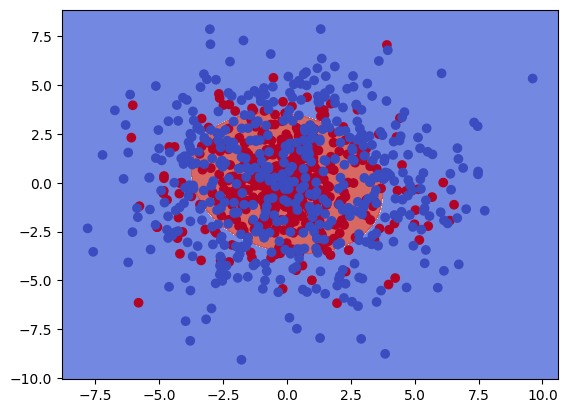

jedrom iz radialnih baznih funkcij


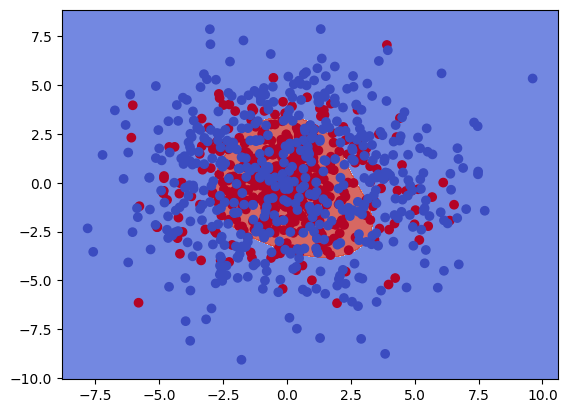

In [60]:

print('polinomsko jedro, d=', 2)
model = SVC(kernel="poly", degree=2).fit(X_train, y_train)
vizualize_decision_boundery(model, X, y)



print('jedrom iz radialnih baznih funkcij')
model = SVC(kernel="rbf").fit(X_train, y_train)
vizualize_decision_boundery(model, X, y)
